In [1]:
from dr_manhattan.exchanges import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
config = {
    "private_key": os.getenv("POLYMARKET_PRIVATE_KEY"),
    "funder": os.getenv("POLYMARKET_FUNDER"),
}

exchange = Polymarket(config)
print(f"Polymarket time-series ready ({'authenticated' if exchange.private_key else 'public'})")

Polymarket time-series ready (authenticated)


In [3]:
crypto_tag = exchange.get_tag_by_slug('crypto')
crypto_hourly = exchange.get_tag_by_slug('1H')
crypto_15min = exchange.get_tag_by_slug('15M')
crypto_daily = exchange.get_tag_by_slug('today')
crypto_hit = exchange.get_tag_by_slug('hit-price')
election = exchange.get_tag_by_slug('election')

crypto_15min

Tag(id='102467', label='15M', slug='15M', force_show=None, force_hide=None, is_carousel=None, published_at=None, created_at='2025-08-06T16:02:23.483913Z', updated_at='2025-09-13T03:05:05.692446Z', raw={'id': '102467', 'label': '15M', 'slug': '15M', 'createdAt': '2025-08-06T16:02:23.483913Z', 'updatedAt': '2025-09-13T03:05:05.692446Z'})

In [6]:
#https://docs.polymarket.com/developers/gamma-markets-api/get-markets

crypto_hourly_markets = exchange.search_markets(
    limit=500,
    tag_id=crypto_daily.id,
    closed=True,
    keywords = ['bitcoin', 'up or down'],
    log=True
)

crypto_hourly_markets[:5]

current-offset: 0
page_limit: 200
----------
current-offset: 200
page_limit: 200
----------
current-offset: 400
page_limit: 100
----------


[Market(id='698802', question='Bitcoin Up or Down on November 25?', outcomes=['Up', 'Down'], close_time=datetime.datetime(2025, 11, 25, 17, 0, tzinfo=datetime.timezone.utc), volume=470689.184224, liquidity=0.0, prices={'Down': 1.0}, metadata={'id': '698802', 'question': 'Bitcoin Up or Down on November 25?', 'conditionId': '0xa37968c00b2ee1135500bc73742683bbdea2755482cb4a7e931670f5ff07af2d', 'slug': 'bitcoin-up-or-down-on-november-25', 'resolutionSource': 'https://www.binance.com/en/trade/BTC_USDT', 'endDate': '2025-11-25T17:00:00Z', 'startDate': '2025-11-23T17:03:05.541664Z', 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', 'description': 'This market will resolve to "Up" if the "Close" price for the Binance 1 minute candle for BTC/USDT Nov 24 \'25 12:00 in the ET timezone (noon) is lower than the final "Close" price for the Nov 25 \'25 12:00 ET candle.\n\nThis market will 

In [7]:
epl_tag = exchange.get_tag_by_slug('EPL')

tottenham_markets = exchange.search_markets(
        limit=500,
        tag_id=epl_tag.id,
        closed=True,
        keywords=['will tottenham win on'],
        log=True
    )

tottenham_markets[:5]

current-offset: 0
page_limit: 200
----------
current-offset: 200
page_limit: 200
----------
current-offset: 400
page_limit: 100
----------


[Market(id='673774', question='Will Tottenham win on 2025-11-23?', outcomes=['Yes', 'No'], close_time=datetime.datetime(2025, 11, 23, 16, 30, tzinfo=datetime.timezone.utc), volume=344634.742233, liquidity=0.0, prices={'No': 1.0}, metadata={'id': '673774', 'question': 'Will Tottenham win on 2025-11-23?', 'conditionId': '0x9d54f1e97ede4d00503d15dcdc324fcec1c87d945baa9939c478f878de434588', 'slug': 'epl-ars-tot-2025-11-23-tot', 'resolutionSource': 'https://www.premierleague.com/', 'endDate': '2025-11-23T16:30:00Z', 'startDate': '2025-11-10T05:08:29.763224Z', 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/Repetitive-markets/premier+league.jpg', 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/Repetitive-markets/premier+league.jpg', 'description': 'In the upcoming game, scheduled for November 23, 2025\nIf Tottenham wins, this market will resolve to "Yes".\nOtherwise, this market will resolve to "No".\nIf the game is postponed, this market will remain open until t

In [8]:
target_market = crypto_hourly_markets[0]
target_market = tottenham_markets[0]

df = exchange.fetch_price_history(target_market, interval="max", fidelity=1, as_dataframe=True)
df

,timestamp,price
0,2025-11-10 05:30:06+00:00,0.5100
1,2025-11-10 05:40:04+00:00,0.5100
2,2025-11-10 05:50:04+00:00,0.5000
3,2025-11-10 06:00:08+00:00,0.5000
4,2025-11-10 06:10:04+00:00,0.5000
...,...,...
1967,2025-11-23 21:10:05+00:00,0.0005
1968,2025-11-23 21:20:09+00:00,0.0005
1969,2025-11-23 21:30:06+00:00,0.0005
1970,2025-11-23 21:40:05+00:00,0.0005


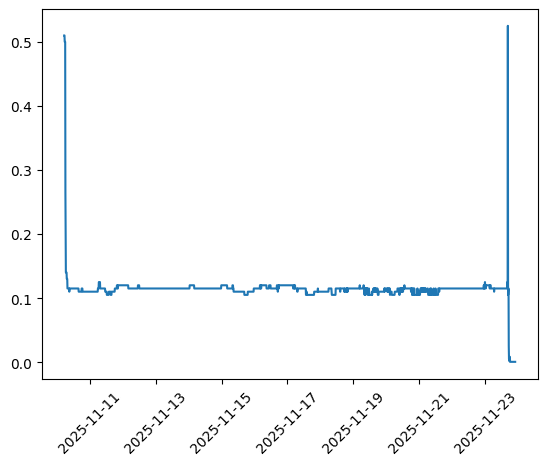

In [9]:
plt.plot(df['timestamp'], df['price'])
plt.xticks(rotation=45)
plt.show()

In [12]:
trades = exchange.fetch_public_trades(market=target_market, limit=1000, as_dataframe=True, log=True)
trades

current-offset: 0
page_limit: 500
----------
current-offset: 500
page_limit: 500
----------


,timestamp,side,asset,condition_id,size,price,proxy_wallet,title,slug,event_slug,outcome,outcome_index,name,pseudonym,bio,profile_image,profile_image_optimized,transaction_hash
0,2025-11-22 08:55:37+00:00,BUY,6393791514491067764833395383683529621550695457...,0x9d54f1e97ede4d00503d15dcdc324fcec1c87d945baa...,8.333332,0.120,0x3216e524e1c96e8cd6a6404d9bb400f112fd709a,Will Tottenham win on 2025-11-23?,epl-ars-tot-2025-11-23-tot,epl-ars-tot-2025-11-23,Yes,0,Poli99,Adored-Shout,,,,0xde833bad395e86ead89173bf1ac9c592990b9d9dee29...
1,2025-11-22 09:03:35+00:00,SELL,7696312838652709085412450532861452226385100462...,0x9d54f1e97ede4d00503d15dcdc324fcec1c87d945baa...,22.460000,0.880,0xeeade87cebd7e74daeb56ea60bb0683c8891fcb9,Will Tottenham win on 2025-11-23?,epl-ars-tot-2025-11-23-tot,epl-ars-tot-2025-11-23,No,1,jiabaoqing,Treasured-Heating,,,,0xf2551bcc477b45699c8af91146aab38ebbe0e5be51e4...
2,2025-11-22 09:17:59+00:00,BUY,6393791514491067764833395383683529621550695457...,0x9d54f1e97ede4d00503d15dcdc324fcec1c87d945baa...,34.000000,0.120,0xe60a9b0be459d9849bc2339dac20517639ae6a47,Will Tottenham win on 2025-11-23?,epl-ars-tot-2025-11-23-tot,epl-ars-tot-2025-11-23,Yes,0,0xb7511d7b0dcb75ffad0507cbac7223653d08915,Comfortable-Gymnast,,,,0x107f11aceec4336ed85944b48f77f5268cdb878a28a2...
3,2025-11-22 09:17:59+00:00,BUY,6393791514491067764833395383683529621550695457...,0x9d54f1e97ede4d00503d15dcdc324fcec1c87d945baa...,144.000000,0.120,0xead152b855effa6b5b5837f53b24c0756830c76a,Will Tottenham win on 2025-11-23?,epl-ars-tot-2025-11-23-tot,epl-ars-tot-2025-11-23,Yes,0,elkmonkey,Unconscious-Penguin,,,,0x0753aa08afc86da89451f8893152775720c9cadf5f0b...
4,2025-11-22 09:59:51+00:00,BUY,7696312838652709085412450532861452226385100462...,0x9d54f1e97ede4d00503d15dcdc324fcec1c87d945baa...,27.000000,0.880,0x204f72f35326db932158cba6adff0b9a1da95e14,Will Tottenham win on 2025-11-23?,epl-ars-tot-2025-11-23-tot,epl-ars-tot-2025-11-23,No,1,swisstony,Frail-Possible,prada flip flops,,,0x4adce062483a5677502cdd8ca0dfd785e3dc0776fdf6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-11-23 19:14:23+00:00,SELL,7696312838652709085412450532861452226385100462...,0x9d54f1e97ede4d00503d15dcdc324fcec1c87d945baa...,55.910000,0.999,0x1823bd09f70d4dde4e9b6e3ba1d6c3e2bc519a8e,Will Tottenham win on 2025-11-23?,epl-ars-tot-2025-11-23-tot,epl-ars-tot-2025-11-23,No,1,novitskiiy,Expensive-Flung,,,,0x551a2ad6d2b5dd5683fbe758e02d9bc42621ae74473c...
996,2025-11-23 20:00:13+00:00,SELL,7696312838652709085412450532861452226385100462...,0x9d54f1e97ede4d00503d15dcdc324fcec1c87d945baa...,7.770000,0.999,0x308521c76a5a6573d0e24b2e0b1ec3c1fc48dd6e,Will Tottenham win on 2025-11-23?,epl-ars-tot-2025-11-23-tot,epl-ars-tot-2025-11-23,No,1,0x308521C76a5A6573d0E24b2E0B1ec3c1fC48Dd6E-176...,Devoted-Gram,,,,0x04490b26cb13341c0b4d1b8968cabdb0bdb2b24c17fa...
997,2025-11-23 20:49:59+00:00,SELL,7696312838652709085412450532861452226385100462...,0x9d54f1e97ede4d00503d15dcdc324fcec1c87d945baa...,0.100000,0.999,0x4e8d2d6220320426b0e4076dbe87802f0a113046,Will Tottenham win on 2025-11-23?,epl-ars-tot-2025-11-23-tot,epl-ars-tot-2025-11-23,No,1,Pollyna,Rough-Jaw,,,,0x701b281ea3ee9e9580b69e23336b10fac43f5e52d89b...
998,2025-11-23 21:02:25+00:00,SELL,7696312838652709085412450532861452226385100462...,0x9d54f1e97ede4d00503d15dcdc324fcec1c87d945baa...,445.560000,0.999,0x43c318f8f22e8d4a96df2ce84c973c0b2d33d618,Will Tottenham win on 2025-11-23?,epl-ars-tot-2025-11-23-tot,epl-ars-tot-2025-11-23,No,1,TheBoyPlunger,Humongous-Restroom,,,,0x49cb2a706c43b999f5d41c2dc0f1097c3b123248ca39...


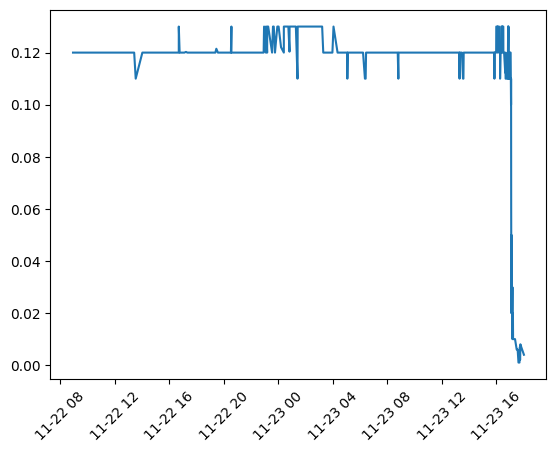

In [13]:
up_trades = trades[trades['outcome_index']==0].set_index('timestamp').sort_index()
down_trades = trades[trades['outcome_index']==1].set_index('timestamp').sort_index()
plt.plot(up_trades['price'])
plt.xticks(rotation=45)
plt.show()

In [16]:
aespakarina = '0xca85f4b9e472b542e1df039594eeaebb6d466bf2'
#tmp_market='0xbb877d541d16896757c57107abe0632450ce1bedb4a46d4eae8ba1d1978207a6'
#user_trades = exchange.fetch_public_trades(market=tmp_market, user=aespakarina, limit=1000)
aespakarina_trades = exchange.fetch_public_trades(user=aespakarina, limit=1000, as_dataframe=True, log=True)
aespakarina_trades[:5]

current-offset: 0
page_limit: 500
----------
current-offset: 500
page_limit: 500
----------


,timestamp,side,asset,condition_id,size,price,proxy_wallet,title,slug,event_slug,outcome,outcome_index,name,pseudonym,bio,profile_image,profile_image_optimized,transaction_hash
0,2025-11-14 17:49:28+00:00,SELL,8856913669484394568816626213748270804481218822...,0x727f2ae60a3fd23a6ad6ca754104aeab936fe0ca6fac...,100.0,0.09,0xca85f4b9e472b542e1df039594eeaebb6d466bf2,"Bitcoin Up or Down - November 14, 12PM ET",bitcoin-up-or-down-november-14-12pm-et,bitcoin-up-or-down-november-14-12pm-et,Up,0,aespakarina,Idle-Exaggeration,one look give em whiplash,https://polymarket-upload.s3.us-east-2.amazona...,,0xf7b2f2df03a4e639379e564dbce1776ecc203ee1381b...
1,2025-11-14 17:49:30+00:00,BUY,5651603994729301248038458007548671976716029398...,0x1684ab496917fa6cad9589ef7f10ea6e22eb77ffa701...,50.0,0.09,0xca85f4b9e472b542e1df039594eeaebb6d466bf2,"Ethereum Up or Down - November 14, 12PM ET",ethereum-up-or-down-november-14-12pm-et,ethereum-up-or-down-november-14-12pm-et,Up,0,aespakarina,Idle-Exaggeration,one look give em whiplash,https://polymarket-upload.s3.us-east-2.amazona...,,0x362289dd2ae7eaa8c09f865438feb9db1220b1c0f2da...
2,2025-11-14 17:49:30+00:00,BUY,5651603994729301248038458007548671976716029398...,0x1684ab496917fa6cad9589ef7f10ea6e22eb77ffa701...,50.0,0.09,0xca85f4b9e472b542e1df039594eeaebb6d466bf2,"Ethereum Up or Down - November 14, 12PM ET",ethereum-up-or-down-november-14-12pm-et,ethereum-up-or-down-november-14-12pm-et,Up,0,aespakarina,Idle-Exaggeration,one look give em whiplash,https://polymarket-upload.s3.us-east-2.amazona...,,0xc1efac098841e1d6fba69c754c344389a4e68864245b...
3,2025-11-14 17:49:30+00:00,BUY,5651603994729301248038458007548671976716029398...,0x1684ab496917fa6cad9589ef7f10ea6e22eb77ffa701...,25.0,0.09,0xca85f4b9e472b542e1df039594eeaebb6d466bf2,"Ethereum Up or Down - November 14, 12PM ET",ethereum-up-or-down-november-14-12pm-et,ethereum-up-or-down-november-14-12pm-et,Up,0,aespakarina,Idle-Exaggeration,one look give em whiplash,https://polymarket-upload.s3.us-east-2.amazona...,,0x003a049e9451e2d7fcd8d5a718953b5fd278f3b8025e...
4,2025-11-14 17:49:30+00:00,SELL,2201085964334626100519593977462610905182508237...,0x1684ab496917fa6cad9589ef7f10ea6e22eb77ffa701...,25.0,0.91,0xca85f4b9e472b542e1df039594eeaebb6d466bf2,"Ethereum Up or Down - November 14, 12PM ET",ethereum-up-or-down-november-14-12pm-et,ethereum-up-or-down-november-14-12pm-et,Down,1,aespakarina,Idle-Exaggeration,one look give em whiplash,https://polymarket-upload.s3.us-east-2.amazona...,,0xe5b756c18bf79836e5033ebb92d278a3dc9d40995dec...
